In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import kagglehub
import pandas as pd
import os
import graphviz
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor, export_graphviz
from sklearn.metrics import classification_report, confusion_matrix, precision_recall_curve, auc, roc_curve
from sklearn.metrics import mean_squared_error
import numpy as np
from statsmodels.tsa.stattools import adfuller
import seaborn as sns
import matplotlib.pyplot as plt
import kagglehub
import pandas as pd
import os
import graphviz
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report, confusion_matrix, precision_recall_curve, auc, roc_curve
from sklearn.metrics import mean_squared_error
import numpy as np
from statsmodels.tsa.stattools import adfuller

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
path = '/content/drive/MyDrive/Datasets/sao-paulo-daily-temperature.csv'
df = pd.read_csv(path)

In [ ]:
#Making the Dataset from 2015 to 2019
df=df[df['Year'] >= 2015]
df = df[df['Year'] < 2020]

In [ ]:
# Create lag features
for lag in range(1, 13):
    df[f'lag_{lag}'] = df['AvgTemperature'].shift(lag)

In [ ]:
# Drop rows with NaN values
df = df.dropna()

# Decision Tree Regression

In [ ]:
# Train-test split
train = df[df['Year'] < 2019 ]
test = df[df['Year'] == 2019]

In [ ]:
X_train = train.drop(columns=['AvgTemperature', 'Year','Month', 'Day', 'Date'])
y_train = train['AvgTemperature']
X_test = test.drop(columns=['AvgTemperature', 'Year','Month', 'Day', 'Date'])
y_test = test['AvgTemperature']

In [ ]:
# Train the Random Forest Regressor
dt = DecisionTreeRegressor(max_depth=10,
random_state=42,
min_impurity_decrease = 0.08,
max_features = 10, min_samples_split = 8,
min_samples_leaf = 2)

dt.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=10, max_features=10, min_impurity_decrease=0.08,
                      min_samples_leaf=2, min_samples_split=8, random_state=42)

In [ ]:
# Predict on the test set
y_pred = dt.predict(X_test)

In [ ]:
from sklearn.metrics import mean_absolute_error, r2_score
# Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
print(f"Mean Absolute Error: {mae}")

# Compute R²
test_r2 = r2_score(y_test, y_pred)
print(f"Test R²: {test_r2:.4f}")

# Compute RMSE
test_rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f"Test RMSE: {test_rmse:.4f}")

# Calculate MAPE
def mean_absolute_percentage_error(y_true, y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

mape = mean_absolute_percentage_error(y_test, y_pred)
print(f"Mean Absolute Percentage Error (MAPE): {mape:.2f}%")


Mean Absolute Error: 3.0764580369851413
Test R²: 0.5946
Test RMSE: 4.0623
Mean Absolute Percentage Error (MAPE): 4.50%


In [ ]:
test['Date'] = pd.to_datetime(test['Date'])

<ipython-input-416-a9d53fe2aee7>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['Date'] = pd.to_datetime(test['Date'])


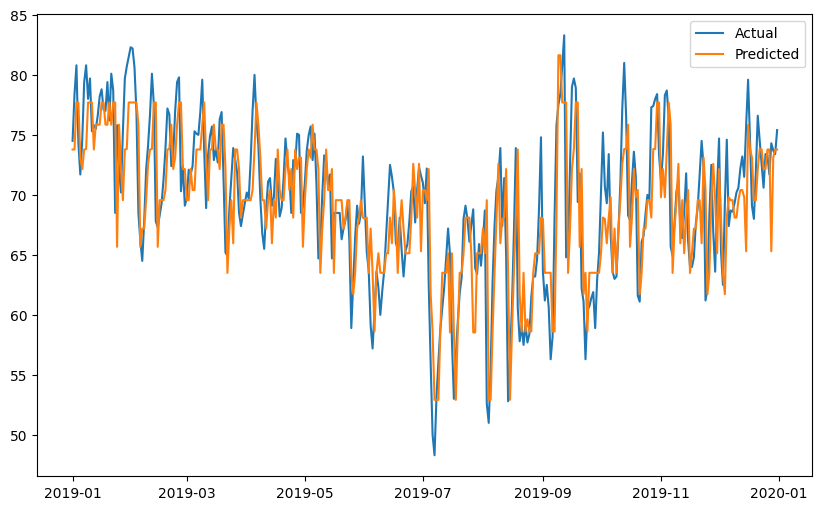

In [ ]:
# Plot actual vs predicted
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
plt.plot(test['Date'], y_test, label='Actual')
plt.plot(test['Date'], y_pred, label='Predicted')
plt.legend()
plt.show()